In [380]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [381]:
from datetime import datetime
fmt = '%Y/%m/%d %H:%M:%S'

In [382]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [383]:
calls = pd.read_csv('callsf0d4f5a.csv')
customers = pd.read_csv('customers2afd6ea.csv')
sentiment = pd.read_csv('sentiment_statisticscc1e57a.csv')
test = pd.read_csv('testbc7185d.csv')

In [714]:
reason = pd.read_csv('reason_new.csv')
reason_count = pd.read_csv('reason_count.csv')

In [385]:
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['Handle_time'] = (calls['call_end_datetime'] - calls['agent_assigned_datetime']).dt.total_seconds()/60
calls['Wait_time'] = (calls['agent_assigned_datetime'] - calls['call_start_datetime']).dt.total_seconds()/60
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Handle_time,Wait_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0


In [386]:
avg_ht = sum(calls['Handle_time'])/len(calls)
avg_wt = sum(calls['Wait_time'])/len(calls)
avg_ht

11.61747667455786

In [387]:
(calls['agent_id'].value_counts().head())

251287    486
594957    481
963118    471
757349    460
376343    452
Name: agent_id, dtype: int64

In [388]:
calls_agent_id = pd.DataFrame(calls.groupby(['agent_id'])['Handle_time'].mean())
calls_agent_id['AST'] = calls.groupby(['agent_id'])['Wait_time'].mean() 
calls_agent_id.head(20)
calls_agent_id.rename(columns={'Handle_time':'AHT'},inplace=True)
calls_agent_id.reset_index(inplace=True)
calls_agent_id.sort_values(by='AHT',ascending=False)

,agent_id,AHT,AST
0,102574,60.000000,8.000000
160,506130,48.000000,7.000000
60,255256,43.666667,4.666667
16,140146,43.666667,6.000000
187,558705,33.000000,7.000000
13,136065,30.000000,7.000000
91,336455,29.000000,8.000000
280,780490,28.000000,6.333333
343,906082,23.666667,8.222222
115,384932,22.500000,10.000000


In [389]:
calls_agent_id['true_AHT'] = avg_ht - calls_agent_id['AHT']
calls_agent_id['true_AST'] = avg_wt - calls_agent_id['AST']
agent_freq = pd.DataFrame(calls['agent_id'].value_counts())
agent_freq.reset_index(inplace=True)
agent_freq.rename(columns={'index':'agent_id','agent_id':'calls'},inplace=True)
calls_agent_id = calls_agent_id.merge(agent_freq,on='agent_id')

In [390]:
calls_agent_id.describe()

,agent_id,AHT,AST,true_AHT,true_AST,calls
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,561734.441253,12.588862,7.288617,-0.971386,-0.004158,187.493473
std,258436.456048,4.728638,0.478213,4.728638,0.478213,137.938465
min,102574.000000,3.000000,4.250000,-48.382523,-2.715541,1.000000
25%,342312.000000,11.006111,7.139922,-1.025234,-0.134123,54.500000
50%,575131.000000,11.718447,7.283019,-0.100970,0.001440,161.000000
75%,788319.000000,12.642711,7.418582,0.611366,0.144537,302.500000
max,993862.000000,60.000000,10.000000,8.617477,3.034459,486.000000


In [391]:
calls_agent_id.sort_values(by='true_AHT')
len(calls_agent_id[calls_agent_id['true_AHT']<0]),len(calls_agent_id)

(209, 383)

In [392]:
px.bar(calls_agent_id,y='true_AHT')

In [393]:
fig1 = px.bar(calls_agent_id,y='AHT')
fig1.add_hline(y=avg_ht)
fig1.show()

In [700]:
calls_agent_id.to_csv('calls_agent_id.csv')

In [394]:
negative_agents = calls_agent_id[calls_agent_id['true_AHT']<0]

In [395]:
sum(negative_agents['calls']),sum(calls_agent_id['calls'])

(31728, 71810)

In [396]:
#percentage of calls tackled by negative true AHT agents
sum(negative_agents['calls'])/sum(calls_agent_id['calls'])*100

44.18326138420833

In [397]:
negative_agents.sort_values(by='true_AHT',ascending=False)

#higher the number of calls for an agent, lesser is the AHT , less number of calls = higer AHT

,agent_id,AHT,AST,true_AHT,true_AST,calls
68,271366,11.617886,7.016260,-0.000410,0.268199,123
278,769083,11.625806,6.909677,-0.008330,0.374782,155
348,917294,11.628205,7.333333,-0.010728,-0.048874,78
90,336230,11.631579,6.796053,-0.014102,0.488406,152
69,274746,11.632768,7.451977,-0.015292,-0.167518,354
22,158530,11.651376,7.183486,-0.033899,0.100973,109
45,213093,11.651786,7.202381,-0.034309,0.082078,336
366,959023,11.676190,7.128571,-0.058714,0.155888,210
355,931734,11.687215,7.417808,-0.069738,-0.133349,438
252,720418,11.690391,7.537367,-0.072915,-0.252908,281


In [710]:
px.scatter(negative_agents,y='calls',x='true_AHT',size='calls',hover_data=['agent_id'])

In [399]:
positive_agents = calls_agent_id[calls_agent_id['true_AHT']>0]
positive_agents.sort_values(by='true_AHT')

,agent_id,AHT,AST,true_AHT,true_AST,calls
97,345872,11.614286,7.185714,0.003191,0.098745,140
180,542034,11.613995,7.187359,0.003481,0.097100,443
174,530215,11.612040,7.311037,0.005437,-0.026578,299
14,136855,11.599303,7.167247,0.018174,0.117212,287
18,149315,11.594848,7.248244,0.022629,0.036215,427
359,938715,11.587156,7.385321,0.030321,-0.100862,218
264,743011,11.577093,7.475771,0.040384,-0.191312,227
107,369972,11.575682,7.265509,0.041794,0.018950,403
363,955854,11.567901,7.185185,0.049575,0.099274,162
320,855386,11.563433,7.485075,0.054044,-0.200616,268


In [400]:
(calls_agent_id[(calls_agent_id['true_AHT']>2)|(calls_agent_id['true_AHT']<-2)]).sort_values(by='calls',ascending=False)

,agent_id,AHT,AST,true_AHT,true_AST,calls
67,266966,14.231405,7.305785,-2.613928,-0.021326,242
81,302709,13.788136,6.864407,-2.170659,0.420052,236
289,792482,13.777202,7.046632,-2.159725,0.237827,193
28,171689,13.893939,7.446970,-2.276463,-0.162511,132
265,743695,14.235772,7.186992,-2.618296,0.097467,123
215,625605,14.775000,7.675000,-3.157523,-0.390541,120
161,510903,9.382609,7.660870,2.234868,-0.376411,115
169,524342,9.375000,7.544643,2.242477,-0.260184,112
242,688153,14.404255,7.319149,-2.786779,-0.034690,94
179,541395,9.500000,7.372340,2.117477,-0.087881,94


In [401]:
calls_agent_id.sort_values(by='calls')

,agent_id,AHT,AST,true_AHT,true_AST,calls
184,547592,3.000000,10.000000,8.617477,-2.715541,1
160,506130,48.000000,7.000000,-36.382523,0.284459,1
0,102574,60.000000,8.000000,-48.382523,-0.715541,2
115,384932,22.500000,10.000000,-10.882523,-2.715541,2
89,335773,18.000000,7.000000,-6.382523,0.284459,2
279,771538,11.000000,9.000000,0.617477,-1.715541,2
187,558705,33.000000,7.000000,-21.382523,0.284459,2
185,548155,10.000000,6.500000,1.617477,0.784459,2
376,980156,18.500000,5.000000,-6.882523,2.284459,2
23,161354,6.000000,7.000000,5.617477,0.284459,2


In [402]:
len(calls_agent_id[calls_agent_id['calls']>250]),len(calls_agent_id[(calls_agent_id['calls']>100) & (calls_agent_id['calls']<250)]), len(calls_agent_id[calls_agent_id['calls']<100])

(145, 105, 131)

In [403]:
px.scatter(calls_agent_id,x='true_AHT',y='calls',size='calls')

In [404]:

#more the number of calls(250+) , the true_AHT generally, hovers around the -1 to +1 mark(10.61 to 12.61) with very less agents having a bad AHT
#for calls 100-250,  true_AHT spread increases generally between -2 to +1 
#for agents having less than 100 calls true_AHT is either really poor or very good

In [702]:
negative_agents.to_csv('negative_agents.csv')
positive_agents.to_csv('positive_agents.csv')

In [405]:
px.bar(calls_agent_id,y='AST')

In [406]:
len(calls_agent_id[(calls_agent_id['true_AST']>0)]), len(calls_agent_id[(calls_agent_id['true_AST']<0)])

(193, 190)

In [407]:
positive_agent_ast = calls_agent_id[(calls_agent_id['true_AST']>0)]
negative_agent_ast = calls_agent_id[(calls_agent_id['true_AST']<0)]

In [408]:
len(negative_agent_ast[negative_agent_ast['true_AST']<-0.5])

25

In [409]:
negative_agent_ast[negative_agent_ast['true_AST']<-0.5]

,agent_id,AHT,AST,true_AHT,true_AST,calls
0,102574,60.000000,8.000000,-48.382523,-0.715541,2
3,107876,16.500000,7.833333,-4.882523,-0.548874,6
4,112609,14.181818,8.090909,-2.564342,-0.806450,11
54,240399,10.583333,7.833333,1.034143,-0.548874,12
77,293966,11.777778,7.888889,-0.160301,-0.604430,9
87,311571,11.400000,7.905882,0.217477,-0.621423,85
91,336455,29.000000,8.000000,-17.382523,-0.715541,3
100,349127,11.935484,7.806452,-0.318007,-0.521993,31
115,384932,22.500000,10.000000,-10.882523,-2.715541,2
125,413148,18.666667,9.333333,-7.049190,-2.048874,3


In [410]:
px.scatter(negative_agent_ast,x='true_AST',y='calls',size='calls')

In [411]:
positive_agent_ast

,agent_id,AHT,AST,true_AHT,true_AST,calls
1,103651,12.456376,7.013423,-0.838899,0.271036,298
7,119952,12.341365,7.216867,-0.723889,0.067592,249
9,126555,12.335958,7.267717,-0.718481,0.016742,381
11,132311,10.321918,7.136986,1.295559,0.147473,292
12,136010,10.417417,7.276276,1.200059,0.008183,333
13,136065,30.000000,7.000000,-18.382523,0.284459,7
14,136855,11.599303,7.167247,0.018174,0.117212,287
16,140146,43.666667,6.000000,-32.049190,1.284459,3
18,149315,11.594848,7.248244,0.022629,0.036215,427
21,158319,11.356234,7.188295,0.261243,0.096164,393


In [412]:
px.scatter(positive_agent_ast,x='true_AST',y='calls',size='calls')

In [413]:
len(calls_agent_id[(calls_agent_id['true_AST']>0.5) | (calls_agent_id['true_AST']<-0.5)])

49

In [414]:
#average AST = 7.28 min, 25 out of 383 agents (6.4 % ) have true AST lesser than -0.5 minutes and only 2 agents have more.. 
#than 50 calls.

#only 5 agents have a true_AST greater than +0.5 (atleast 50 calls) , sugesting majority agents hover around the average....
#AST mark, which in itself is quite large(7.28). Therefore, we need more analysis to optimize this figure.

In [603]:
calls['hour'] = calls['call_start_datetime'].dt.hour

In [605]:
calls_hour_analysis = calls.drop(columns={'call_id','customer_id','call_transcript'})

In [609]:
calls_hourly_analysis = pd.DataFrame(calls_hour_analysis.groupby(['hour','agent_id']).agg(handle_time=('Handle_time','mean'),wait_time=('Wait_time','mean'),number_of_calls=('call_end_datetime','size')))

In [611]:
calls_hourly_analysis.reset_index(inplace=True)

In [703]:
calls_per_hour = pd.DataFrame(calls_hourly_analysis.groupby(['hour'])['number_of_calls'].sum())

In [614]:
calls_peak_hour_analysis = calls_hourly_analysis[(calls_hourly_analysis['hour']>=8) & (calls_hourly_analysis['hour']<=18)]

In [624]:
calls_peak_hour_analysis = calls_peak_hour_analysis.groupby(['agent_id']).agg(handle_time=('handle_time','mean'),wait_time=('wait_time','mean'),number_of_calls=('number_of_calls','sum'))

In [625]:
calls_peak_hour_analysis

,handle_time,wait_time,number_of_calls
agent_id,,,
103651,13.249182,7.017522,283
106000,15.411935,7.740066,96
107876,19.333333,9.333333,3
112609,12.000000,9.000000,4
113217,11.160324,7.578220,257
114609,18.627826,7.652979,59
119952,10.805043,7.606527,169
121149,11.828283,7.520139,84
126555,12.316935,7.295173,361


In [745]:
calls_peak_hour_analysis.to_csv("calls_peak_hour_analysis")

In [746]:
calls_peak_hour_analysis.to_csv('calls_peak_hour_analysis.csv')

In [705]:
calls_per_hour.to_csv('calls_per_hour.csv')

In [626]:
calls_peak_hour_analysis['rank_handle_time'] = calls_peak_hour_analysis['handle_time'].rank(ascending=True)
calls_peak_hour_analysis['rank_wait_time'] = calls_peak_hour_analysis['wait_time'].rank(ascending=True)
calls_peak_hour_analysis['rank_number_of_calls'] = calls_peak_hour_analysis['number_of_calls'].rank(ascending=True)

In [627]:
calls_peak_hour_analysis['net_rank'] = (calls_peak_hour_analysis['rank_handle_time'] + calls_peak_hour_analysis['rank_wait_time'] + calls_peak_hour_analysis['rank_number_of_calls'])/3 

In [628]:
calls_peak_hour_analysis.sort_values(by='net_rank',ascending=True,inplace=True)

In [629]:
calls_peak_hour_analysis

,handle_time,wait_time,number_of_calls,rank_handle_time,rank_wait_time,rank_number_of_calls,net_rank
agent_id,,,,,,,
926175,7.500000,5.750000,4,8.0,4.0,18.0,10.000000
545730,6.400000,6.400000,5,3.0,11.5,25.0,13.166667
229129,8.400000,6.200000,5,19.0,9.0,25.0,17.666667
281512,2.000000,7.000000,1,1.0,61.5,4.0,22.166667
676262,6.600000,7.000000,5,5.0,61.5,25.0,30.500000
964561,8.033333,6.497222,21,13.0,14.0,67.5,31.500000
814757,10.222222,6.111111,9,60.0,8.0,42.5,36.833333
925821,10.375000,6.250000,8,75.0,10.0,39.0,41.333333
576990,8.289767,6.861989,37,17.0,40.0,80.0,45.666667


In [415]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Handle_time,Wait_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0


In [416]:
sentiment.head(20)

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
5,5297766997,817160,calm,calm,0.10,0.11
6,324593040,519057,neutral,frustrated,0.00,0.25
7,8902603117,488324,calm,angry,0.11,0.35
8,7222687732,957331,calm,neutral,0.06,0.54
9,4113684017,158319,neutral,angry,-0.19,0.29


In [417]:
sentiment['agent_tone'].value_counts(), sentiment['customer_tone'].value_counts()

(neutral       42758
 calm          24675
 frustrated     3684
 angry           389
 polite           87
 Name: agent_tone, dtype: int64,
 neutral       14444
 angry         14408
 polite        14371
 calm          14347
 frustrated    14240
 Name: customer_tone, dtype: int64)

In [418]:
tone = {'neutral':3,'calm':4,'frustrated':2,'angry':1,'polite':5}

In [419]:
sentiment['agent_tone_label'] = sentiment['agent_tone'].map(tone)
sentiment['customer_tone_label'] = sentiment['customer_tone'].map(tone)

In [420]:
calls_sentiment = calls.merge(sentiment,on='call_id')

In [421]:
calls_sentiment.rename(columns={'agent_id_x':'agent_id'},inplace=True)

In [422]:
calls_sentiment.head(20)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Handle_time,Wait_time,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,agent_tone_label,customer_tone_label
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0,963118,neutral,angry,-0.04,0.39,3.0,1
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0,519057,calm,neutral,0.02,0.35,4.0,3
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0,158319,neutral,polite,-0.13,0.32,3.0,5
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0,488324,neutral,frustrated,-0.20,0.20,3.0,2
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0,721730,neutral,polite,-0.05,0.35,3.0,5
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,24.0,5.0,817160,calm,calm,0.10,0.11,4.0,4
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,13.0,13.0,519057,neutral,frustrated,0.00,0.25,3.0,2
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,8.0,8.0,488324,calm,angry,0.11,0.35,4.0,1
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,13.0,8.0,957331,calm,neutral,0.06,0.54,4.0,3
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,9.0,8.0,158319,neutral,angry,-0.19,0.29,3.0,1


In [423]:
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [424]:
calls_sentiment = calls_sentiment.merge(customers,on='customer_id')

In [425]:
calls_sentiment.drop(columns={'customer_name'},inplace=True)

In [426]:
calls_sentiment.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Handle_time,Wait_time,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,agent_tone_label,customer_tone_label,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0,963118,neutral,angry,-0.04,0.39,3.0,1,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0,519057,calm,neutral,0.02,0.35,4.0,3,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0,158319,neutral,polite,-0.13,0.32,3.0,5,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0,488324,neutral,frustrated,-0.20,0.20,3.0,2,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0,721730,neutral,polite,-0.05,0.35,3.0,5,0.0


In [538]:
sentiment_analysis = calls_sentiment.drop(columns={'call_transcript','agent_id_y','agent_tone','customer_tone','call_id','customer_id','agent_id'})

In [539]:
sentiment_analysis['silence_time'] = sentiment_analysis['Handle_time']*sentiment_analysis['silence_percent_average']
sentiment_analysis['hour'] = sentiment_analysis['call_start_datetime'].dt.hour

In [540]:
sentiment_analysis.head()

,call_start_datetime,agent_assigned_datetime,call_end_datetime,Handle_time,Wait_time,average_sentiment,silence_percent_average,agent_tone_label,customer_tone_label,elite_level_code,hour,silence_time
0,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,31.0,7.0,-0.04,0.39,3.0,1,4.0,23,12.09
1,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,12.0,3.0,0.02,0.35,4.0,3,NaN,0,4.20
2,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,19.0,8.0,-0.13,0.32,3.0,5,NaN,23,6.08
3,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,7.0,5.0,-0.20,0.20,3.0,2,2.0,0,1.40
4,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,9.0,10.0,-0.05,0.35,3.0,5,0.0,0,3.15


In [541]:
agent_tone_analysis = pd.DataFrame(sentiment_analysis.groupby(['agent_tone_label'])['average_sentiment'].mean())
agent_tone_analysis.reset_index(inplace=True)

In [542]:
agent_tone_analysis = agent_tone_analysis.merge(pd.DataFrame(sentiment_analysis.groupby(['agent_tone_label'])['average_sentiment'].count()),on='agent_tone_label')

In [543]:
agent_tone_analysis.rename(columns={'average_sentiment_x':'average_sentiment','average_sentiment_y':'count'},inplace=True)

In [544]:
agent_tone_analysis = agent_tone_analysis.merge(sentiment_analysis.groupby(['agent_tone_label'])['Handle_time','Wait_time','silence_time','elite_level_code'].mean(),on='agent_tone_label')

In [545]:
agent_tone_analysis['silence_time_pct'] = agent_tone_analysis['silence_time']/agent_tone_analysis['Handle_time']

In [546]:
agent_tone_analysis

,agent_tone_label,average_sentiment,count,Handle_time,Wait_time,silence_time,elite_level_code,silence_time_pct
0,1.0,-0.616478,389,6.573265,7.084833,2.048869,1.370656,0.311697
1,2.0,-0.329978,3684,10.284473,7.073290,3.626743,1.301608,0.352643
2,3.0,-0.080355,42758,12.504607,7.240727,4.665427,1.377620,0.373097
3,4.0,0.101289,24675,10.441662,7.392138,3.905873,1.371587,0.374066
4,5.0,0.673793,87,3.666667,7.689655,1.536207,1.142857,0.418966


In [547]:
#quite evidently, average sentiment is greatest when tone is polite, handle time is the least, but silence time .......
#percentage is the highest.

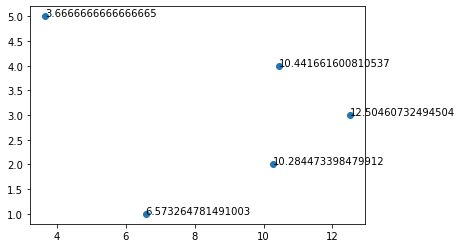

In [548]:
plt.scatter(agent_tone_analysis['Handle_time'],agent_tone_analysis['agent_tone_label'])
for i in range(len(agent_tone_analysis)):
    plt.text(agent_tone_analysis['Handle_time'][i],agent_tone_analysis['agent_tone_label'][i],agent_tone_analysis['Handle_time'][i])
plt.show()

In [549]:
customer_tone_analysis = pd.DataFrame(sentiment_analysis.groupby(['customer_tone_label'])['average_sentiment'].mean())
customer_tone_analysis.reset_index(inplace=True)

In [550]:
customer_tone_analysis = customer_tone_analysis.merge(pd.DataFrame(sentiment_analysis.groupby(['customer_tone_label'])['average_sentiment'].count()),on='customer_tone_label')

In [551]:
customer_tone_analysis.rename(columns={'average_sentiment_x':'average_sentiment','average_sentiment_y':'count'},inplace=True)

In [552]:
customer_tone_analysis = customer_tone_analysis.merge(sentiment_analysis.groupby(['customer_tone_label'])['Handle_time','Wait_time','silence_time','elite_level_code'].mean(),on='customer_tone_label')

In [553]:
customer_tone_analysis['silence_time_pct'] = customer_tone_analysis['silence_time']/agent_tone_analysis['Handle_time']

In [554]:
customer_tone_analysis

,customer_tone_label,average_sentiment,count,Handle_time,Wait_time,silence_time,elite_level_code,silence_time_pct
0,1,-0.032427,14388,11.592171,7.274084,4.292314,1.374275,0.652996
1,2,-0.034490,14222,11.545646,7.280056,4.289149,1.370504,0.417051
2,3,-0.033709,14428,11.793755,7.295901,4.417305,1.379100,0.353254
3,4,-0.032501,14322,11.660068,7.297205,4.346697,1.355751,0.416284
4,5,-0.034475,14341,11.494329,7.274998,4.280221,1.374582,1.167333


In [556]:
#clearly in the case of customer and agent tones, the sentiment keeps getting better with increasing tone label or .......
#remains the same.

In [706]:
agent_tone_analysis.to_csv('agent_tone_analysis.csv')
customer_tone_analysis.to_csv('customer_tone_analysis.csv')

In [557]:
sentiment_analysis.head()

,call_start_datetime,agent_assigned_datetime,call_end_datetime,Handle_time,Wait_time,average_sentiment,silence_percent_average,agent_tone_label,customer_tone_label,elite_level_code,hour,silence_time
0,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,31.0,7.0,-0.04,0.39,3.0,1,4.0,23,12.09
1,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,12.0,3.0,0.02,0.35,4.0,3,NaN,0,4.20
2,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,19.0,8.0,-0.13,0.32,3.0,5,NaN,23,6.08
3,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,7.0,5.0,-0.20,0.20,3.0,2,2.0,0,1.40
4,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,9.0,10.0,-0.05,0.35,3.0,5,0.0,0,3.15


In [632]:
sentiment_by_hour = pd.DataFrame(sentiment_analysis.groupby(['hour','agent_tone_label','customer_tone_label']).agg(handle_time=('Handle_time','mean'),wait_time=('Wait_time','mean'),number_of_calls=('call_start_datetime','size'),average_sentiment=('average_sentiment','mean'),silence_time=('silence_time','mean')))
sentiment_by_hour.reset_index(inplace=True)

In [633]:
sentiment_by_hour['silence_pct'] = sentiment_by_hour['silence_time']/sentiment_by_hour['handle_time']

In [634]:
sentiment_by_hour.sort_values(by='number_of_calls',ascending=False)

,hour,agent_tone_label,customer_tone_label,handle_time,wait_time,number_of_calls,average_sentiment,silence_time,silence_pct
331,15,3.0,4,12.640416,7.227340,673,-0.083834,4.790788,0.379006
214,10,3.0,5,12.430723,7.338855,664,-0.082184,4.535437,0.364857
165,8,3.0,3,13.069803,7.342944,659,-0.074036,4.840046,0.370323
307,14,3.0,4,12.835866,7.305471,658,-0.083495,5.032994,0.392104
257,12,3.0,1,12.310398,7.215596,654,-0.079511,4.644205,0.377259
260,12,3.0,4,12.396313,7.265745,651,-0.080998,4.561444,0.367968
234,11,3.0,1,11.434515,7.214176,649,-0.079553,3.932357,0.343902
376,17,3.0,1,12.269767,7.088372,645,-0.080527,4.503860,0.367070
304,14,3.0,1,12.238760,7.279070,645,-0.083674,4.561302,0.372693
354,16,3.0,3,12.984424,7.158879,642,-0.081340,4.945872,0.380908


In [635]:
sentiment_by_hour.groupby(['hour'])['number_of_calls'].sum()

hour
0     1146
1     1123
2     1050
3     1066
4     1056
5     1099
6     1078
7     1608
8     5183
9     5304
10    5183
11    5231
12    5289
13    5152
14    5174
15    5163
16    5211
17    5216
18    4671
19    1109
20    1137
21    1102
22    1125
23    1117
Name: number_of_calls, dtype: int64

In [647]:
sentiment_by_peak_hour = sentiment_by_hour[(sentiment_by_hour['hour']>=8) & (sentiment_by_hour['hour']<=18)]

In [648]:
sentiment_by_peak_hour = sentiment_by_peak_hour.groupby(['agent_tone_label','customer_tone_label']).agg(handle_time=('handle_time','mean'),wait_time=('wait_time','mean'),average_sentiment=('average_sentiment','mean'),silence_pct=('silence_pct','mean'),number_of_calls=('number_of_calls','sum')).reset_index()

In [649]:
sentiment_by_peak_hour['rank_handle_time'] = sentiment_by_peak_hour['handle_time'].rank(ascending=True)
sentiment_by_peak_hour['rank_number_of_calls'] = sentiment_by_peak_hour['number_of_calls'].rank(ascending=True)
sentiment_by_peak_hour['rank_sentiment'] = sentiment_by_peak_hour['average_sentiment'].rank(ascending=False)
sentiment_by_peak_hour['rank_silence'] = sentiment_by_peak_hour['silence_pct'].rank(ascending=False)

In [650]:
sentiment_by_peak_hour['net_rank'] = (sentiment_by_peak_hour['rank_handle_time'] +sentiment_by_peak_hour['rank_number_of_calls'] + sentiment_by_peak_hour['rank_sentiment']+sentiment_by_peak_hour['silence_pct'])/4

In [651]:
sentiment_by_peak_hour.sort_values(by='net_rank',ascending=True,inplace=True)

In [652]:
sentiment_by_peak_hour

,agent_tone_label,customer_tone_label,handle_time,wait_time,average_sentiment,silence_pct,number_of_calls,rank_handle_time,rank_number_of_calls,rank_sentiment,rank_silence,net_rank
23,5.0,4,2.428571,8.857143,0.742857,0.182595,13,2.0,2.0,1.0,25.0,1.295649
24,5.0,5,1.812500,7.125000,0.652500,0.237500,11,1.0,1.0,4.0,22.0,1.559375
21,5.0,2,4.523810,8.595238,0.700000,0.220583,15,4.0,4.5,2.0,24.0,2.680146
22,5.0,3,4.023810,7.047619,0.586071,0.260032,15,3.0,4.5,5.0,20.0,3.190008
20,5.0,1,8.500000,7.812500,0.671875,0.486754,14,10.0,3.0,3.0,1.0,4.121688
2,1.0,3,5.701227,6.738745,-0.582722,0.252832,67,5.0,9.0,21.0,21.0,8.813208
3,1.0,4,6.087951,7.241847,-0.649196,0.282725,54,6.0,6.0,25.0,18.0,9.320681
15,4.0,1,10.386269,7.378591,0.103742,0.380386,3870,14.0,17.0,6.0,2.0,9.345097
0,1.0,1,8.395202,7.325000,-0.596533,0.301553,61,9.0,7.0,22.0,17.0,9.575388
16,4.0,2,10.394367,7.384814,0.102181,0.368856,3826,15.0,16.0,7.0,11.0,9.592214


In [707]:
sentiment_by_peak_hour.to_csv('sentiment_by_peak_hour.csv')

In [715]:
reason = pd.read_csv('reason_new.csv')

In [716]:
len(reason)

66653

In [717]:
reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [718]:
calls_reason = calls.merge(reason,on='call_id')

In [719]:
calls_reason.to_csv('calls_reason.csv')

In [721]:
calls_reason.tail()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Handle_time,Wait_time,hour,primary_call_reason
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,10.0,6.0,23,Mileage Plus
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,28.0,9.0,23,Post Flight
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,8.0,3.0,23,Upgrade
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,6.0,6.0,23,Upgrade
66652,8210720833,8014388758,547592,2024-08-31 23:49:00,2024-08-31 23:59:00,2024-09-01 00:02:00,\n\nAgent: Thank you for calling United Airlin...,3.0,10.0,23,Digital Support


In [722]:
calls_reason['hour'] = calls_reason['call_start_datetime'].dt.hour

In [723]:
calls_reason.head(100)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,Handle_time,Wait_time,hour,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,31.0,7.0,23,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,12.0,3.0,0,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,19.0,8.0,23,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,7.0,5.0,0,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,9.0,10.0,0,Seating
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,24.0,5.0,0,Mileage Plus
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,13.0,13.0,0,Checkout
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,8.0,8.0,0,Mileage Plus
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,13.0,8.0,0,Mileage Plus
9,4113684017,1528835057,158319,2024-08-01 00:20:00,2024-08-01 00:28:00,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,9.0,8.0,0,IRROPS


In [724]:
reason_analysis= pd.DataFrame(calls_reason.groupby(['hour','primary_call_reason']).agg(number_of_calls=('call_id','size'),handle_time=('Handle_time','mean'),wait_time=('Wait_time','mean')))

In [725]:
reason_analysis.reset_index(inplace=True)

In [726]:
reason_analysis.sort_values(by='handle_time',ascending=False)

,hour,primary_call_reason,number_of_calls,handle_time,wait_time
446,22,ETC,13,26.307692,8.615385
143,7,Checkout,49,21.612245,12.428571
147,7,ETC,26,21.076923,8.846154
29,1,Mileage Plus,97,20.278351,5.876289
403,20,Checkout,30,20.200000,12.633333
103,5,Checkout,32,19.843750,12.156250
223,11,Checkout,126,19.547619,12.158730
109,5,Mileage Plus,85,19.400000,6.282353
466,23,ETC,10,19.400000,8.400000
167,8,ETC,81,19.098765,9.209877


In [727]:
hour = pd.DataFrame(reason_analysis.groupby(['hour'])['number_of_calls'].sum())
hour.to_csv('hour.csv')

In [728]:
peak_time_reason_analysis = reason_analysis[(reason_analysis['hour']>=8) & (reason_analysis['hour']<=18)]

In [729]:
peak_time_reason_analysis.sort_values(by='number_of_calls',ascending=False)

,hour,primary_call_reason,number_of_calls,handle_time,wait_time
208,10,IRROPS,1008,13.419643,6.057540
248,12,IRROPS,1006,12.635189,5.993042
168,8,IRROPS,1005,13.818905,6.097512
348,17,IRROPS,982,13.726069,6.040733
188,9,IRROPS,969,13.268318,6.041280
228,11,IRROPS,963,12.267913,5.941848
308,15,IRROPS,956,13.125523,5.989540
328,16,IRROPS,943,12.972428,6.003181
288,14,IRROPS,940,13.069149,5.971277
268,13,IRROPS,939,12.855165,6.015974


In [730]:
peak_reasons= pd.DataFrame(peak_time_reason_analysis.groupby(['primary_call_reason']).agg(number_of_calls=('number_of_calls','sum'),handle_time=('handle_time','mean'),wait_time=('wait_time','mean')))

In [731]:
peak_reasons['rank_number_of_calls'] = peak_reasons['number_of_calls'].rank(ascending=False)
peak_reasons['rank_handle_time'] = peak_reasons['handle_time'].rank(ascending=False)
peak_reasons['rank_wait_time'] = peak_reasons['wait_time'].rank(ascending=False)

In [732]:
peak_reasons['net_rank'] = (peak_reasons['rank_number_of_calls'] + peak_reasons['rank_handle_time'] + peak_reasons['rank_wait_time'])/3

In [733]:
peak_reasons.sort_values(by='net_rank',ascending=True)

#lower the net rank, more are the number of calls recieved/time invested in handling/waiting

,number_of_calls,handle_time,wait_time,rank_number_of_calls,rank_handle_time,rank_wait_time,net_rank
primary_call_reason,,,,,,,
Post Flight,3449,15.574893,9.490023,5.0,4.0,5.0,4.666667
Checkout,1454,16.765492,12.080185,12.0,1.0,1.0,4.666667
Mileage Plus,4650,16.536798,6.007957,4.0,2.0,13.0,6.333333
IRROPS,10607,13.112504,6.012188,1.0,6.0,12.0,6.333333
Voluntary Change,8548,10.698504,9.000891,2.0,9.0,8.0,6.333333
Seating,5064,7.938799,9.515935,3.0,14.0,4.0,7.000000
ETC,755,15.913519,9.077351,15.0,3.0,6.0,8.000000
Products and Services,2643,12.486932,5.044827,7.0,7.0,15.0,9.666667
Voluntary Cancel,1273,12.104280,8.965253,13.0,8.0,9.0,10.000000


In [734]:
peak_reasons.sort_values(by='number_of_calls',ascending=False,inplace=True)
peak_reasons

,number_of_calls,handle_time,wait_time,rank_number_of_calls,rank_handle_time,rank_wait_time,net_rank
primary_call_reason,,,,,,,
IRROPS,10607,13.112504,6.012188,1.0,6.0,12.0,6.333333
Voluntary Change,8548,10.698504,9.000891,2.0,9.0,8.0,6.333333
Seating,5064,7.938799,9.515935,3.0,14.0,4.0,7.000000
Mileage Plus,4650,16.536798,6.007957,4.0,2.0,13.0,6.333333
Post Flight,3449,15.574893,9.490023,5.0,4.0,5.0,4.666667
Communications,3050,13.793891,3.992152,6.0,5.0,19.0,10.000000
Products and Services,2643,12.486932,5.044827,7.0,7.0,15.0,9.666667
Baggage,2250,5.551799,9.041992,8.0,19.0,7.0,11.333333
Upgrade,2171,10.550457,4.969295,9.0,10.0,16.0,11.666667


In [735]:
reason_frequency_analysis = reason_analysis.groupby(['primary_call_reason']).agg(number_of_calls=('number_of_calls','sum'),handle_time=('handle_time','mean')).reset_index()

In [736]:
reason_frequency_analysis.sort_values(by='number_of_calls',ascending=False,inplace=True)

In [737]:
reason_frequency_analysis

,primary_call_reason,number_of_calls,handle_time
8,IRROPS,13311,13.033101
19,Voluntary Change,10848,10.591650
14,Seating,6365,7.922554
9,Mileage Plus,5851,16.615320
11,Post Flight,4330,15.602392
4,Communications,3840,13.748234
12,Products and Services,3332,12.404799
0,Baggage,2832,5.541382
17,Upgrade,2738,10.416398
1,Booking,2637,7.193175


In [738]:
most_frequent = reason_frequency_analysis.loc[9][2] 
least_frequent = reason_frequency_analysis.loc[19][2]

In [739]:
percentage_difference = (most_frequent - least_frequent) / ((most_frequent + least_frequent) /2) *100

In [740]:
percentage_difference

44.28034764503877

In [742]:
peak_reasons.to_csv('peak_reasons.csv')

In [743]:
peak_time_reason_analysis.to_csv('peak_time_reaosn_analysis.csv')

In [744]:
reason_frequency_analysis.to_csv('rfa.csv')